In [ ]:
# connect with google drive
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
pip install tensorflow-determinism

In [ ]:
! nvidia-smi 
! nvidia-smi -L

In [ ]:
#load user-defined packages
%run drive/Shared\ drives/Ziqiang/Mnist_condi/For_github/Set_seed.ipynb $useColab\n
%run drive/Shared\ drives/Ziqiang/Mnist_condi/For_github/NN_Utils.ipynb $useColab\n
%run drive/Shared\ drives/Ziqiang/Mnist_condi/For_github/InstanceNormalization.ipynb $useColab\n
%run drive/Shared\ drives/Ziqiang/Mnist_condi/For_github/GAN_Utils.ipynb $useColab\n
%run drive/Shared\ drives/Ziqiang/Mnist_condi/For_github/swd_tf2.ipynb $useColab\n
%run drive/Shared\ drives/Ziqiang/Mnist_condi/For_github/t-SNE_Utils.ipynb $useColab\n
%run drive/Shared\ drives/Ziqiang/Mnist_condi/For_github/Utils_MNIST.ipynb $useColab\n


In [ ]:
seed='19'
set_seed(int(seed))
print(int(seed))

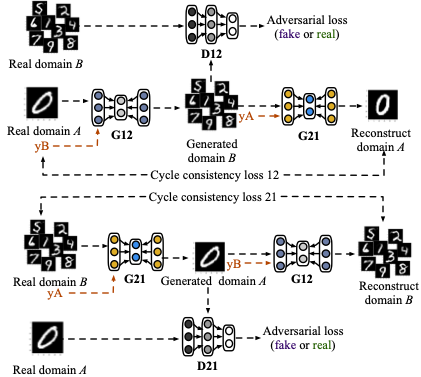

> Indented block


<--- The architecture of conditional cyclegan for mapping handwritting '0' to different handwrittings, i.e., '1' or '2',...,or '9'. 
$y_A$ denotes labels from '1' to '9'. i.e., y_{A}={1,1,1,...,2,2,2,...,9,9,9};y_B$ denotes labels only from '0', y_{B}={0,0,0,...,0,0,0,...,0,0,0}; Real domain A dataset is from '0' while Real domain B dataset is from '1' to '9'. 

The generator G12 wants to transform dataset from x_{A} to x_{B}
\begin{equation}
x_{A}+y_{B}-->G12-->x_{B};
\end{equation}

The generator G12 wants to transform dataset from x_{A} to x_{B}
\begin{equation}
x_{B}+y_{A}-->G21-->x_{A}.
\end{equation}

The discriminator D12 distinuish whether x_{B} is from real dataset x_{B} or generated from G{12}; The discriminator D21 distinuish whether x_{A} is from real dataset x_{A} or generated from G{21};

In [ ]:
#load dataset (balanced)
ds_x, _, ds_x_T, _ = get_1to9_ds()
x1=ds_x[0:600]
x2=ds_x[6742:6742+600]
x3=ds_x[12700:12700+600]
x4=ds_x[18831:18831+600]
x5=ds_x[24673:24673+600]
x6=ds_x[30094:30094+600]
x7=ds_x[36012:36012+600]
x8=ds_x[42277:42277+600]
x9=ds_x[48128:48128+600]

ds_x=np.vstack([x1,x2,x3,x4,x5,x6,x7,x8,x9])#多类故障数据
ds_y=np.array([1]*600+[2]*600+[3]*600+[4]*600+[5]*600+[6]*600+[7]*600+[8]*600+[9]*600)#正常标签
print('X_B',ds_x.shape,'y_A',ds_y.shape)

x1_T=ds_x_T[0:100]
x2_T=ds_x_T[1135:1135+100]
x3_T=ds_x_T[2167:2167+100]
x4_T=ds_x_T[3177:3177+100]
x5_T=ds_x_T[4159:4159+100]
x6_T=ds_x_T[5051:5051+100]
x7_T=ds_x_T[6009:6009+100]
x8_T=ds_x_T[7037:7037+100]
x9_T=ds_x_T[8011:8011+100]
# print(x2_T.shape)
ds_x_T=np.vstack([x1_T,x2_T,x3_T,x4_T,x5_T,x6_T,x7_T,x8_T,x9_T])
ds_y_T=np.array([1]*100+[2]*100+[3]*100+[4]*100+[5]*100+[6]*100+[7]*100+[8]*100+[9]*100)
print('X_B testing:',ds_x_T.shape,'y_B testing',ds_y_T.shape)


x0, y0, x0_T, y0_T = get_0_ds()
x0=x0[0:5400]#正常数据
y0=np.array([0]*600+[0]*600+[0]*600+[0]*600+[0]*600+[0]*600+[0]*600+[0]*600+[0]*600)
x0_T=x0_T[0:900]
y0_T=np.array([0]*100+[0]*100+[0]*100+[0]*100+[0]*100+[0]*100+[0]*100+[0]*100+[0]*100)

print('X_A',x0.shape,'X_B', y0.shape)
print('X_A testing',x0_T.shape, y0_T.shape)
x0, y0, x0_T, y0_T=tf.convert_to_tensor(x0),_process_y(y0),tf.convert_to_tensor(x0_T),_process_y(y0_T)
ds_x, ds_y, ds_x_T, ds_y_T=tf.convert_to_tensor(ds_x),_process_y(ds_y),tf.convert_to_tensor(ds_x_T),_process_y(ds_y_T)

# Visualize the MNIST data

In [ ]:
# handwritting visualization
visual_Mnist(x0,5398)#<-- users can change x0 to x1,x2,...,x9

# Run (SWD-SEM) 

In [ ]:
%run drive/Shared\ drives/Ziqiang/Mnist_condi/For_github/CycleGAN.ipynb $useColab\n
IMG_SHAPE = (28, 28, 1)
BATCH_SIZE = 32
LAMBDA = 10
STEP = 1000
model_type='sem'
loss_type='swd-sem'
CycleGAN = CycleGAN(LAMBDA, IMG_SHAPE,model_type)
train(seed,loss_type,CycleGAN, 
      x0,y0, ds_x,ds_y, x0_T,y0_T, ds_x_T,ds_y_T, 
      STEP, BATCH_SIZE)

# Run (WD-SEM)

In [ ]:
%run drive/Shared\ drives/Ziqiang/Mnist_condi/For_github/CycleGAN.ipynb $useColab\n
IMG_SHAPE = (28, 28, 1)
BATCH_SIZE = 32
LAMBDA = 10
STEP = 10000
model_type='sem'
loss_type='wd-sem'

CycleGAN = CycleGAN(LAMBDA, IMG_SHAPE,model_type)
train(seed,loss_type,CycleGAN, 
      x0,y0, ds_x,ds_y, x0_T,y0_T, ds_x_T,ds_y_T, 
      STEP, BATCH_SIZE)

# Run (SWD)

In [ ]:
%run drive/Shared\ drives/Ziqiang/Mnist_condi/For_github/CycleGAN.ipynb $useColab\n
IMG_SHAPE = (28, 28, 1)
BATCH_SIZE = 32
LAMBDA = 10
STEP = 10000
model_type=None
loss_type='swd'

CycleGAN = CycleGAN(LAMBDA, IMG_SHAPE,model_type)
train(seed,loss_type,CycleGAN, 
      x0,y0, ds_x,ds_y, x0_T,y0_T, ds_x_T,ds_y_T, 
      STEP, BATCH_SIZE)

# Run (WD)

In [ ]:
%run drive/Shared\ drives/Ziqiang/Mnist_condi/For_github/CycleGAN.ipynb $useColab\n
IMG_SHAPE = (28, 28, 1)
BATCH_SIZE = 32
LAMBDA = 10
STEP = 10000
model_type=None
loss_type='wd'

CycleGAN = CycleGAN(LAMBDA, IMG_SHAPE,model_type)
train(seed,loss_type,CycleGAN, 
      x0,y0, ds_x,ds_y, x0_T,y0_T, ds_x_T,ds_y_T, 
      STEP, BATCH_SIZE)